In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Dataset 1 - Apple Quality
https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality

In [5]:
df_apple = pd.read_csv("data1/apple_quality.csv").iloc[:-1].drop('A_id', axis=1) #drop last row as it does not contain relevent data
df_apple['Acidity'] = df_apple['Acidity'].astype('float64')
df_apple.head(2)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.32984,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.86753,-0.722809,good


In [6]:
len(df_apple) #checking dataset length

4000

### Checking for missing values and column datatypes

In [7]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 250.1+ KB


### Checking Target Variable

In [8]:
#Identify target column cardinality.
df_apple['Quality'].unique()

array(['good', 'bad'], dtype=object)

In [9]:
df_apple['Quality'].value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

In [10]:
### Checking predictor variables
min_values = df_apple.drop('Quality', axis=1).min()
max_values = df_apple.drop('Quality', axis=1).max()

# Create a new DataFrame
summary_df = pd.DataFrame({'Min': min_values, 'Max': max_values})

print(summary_df)

                  Min       Max
Size        -7.151703  6.406367
Weight      -7.149848  5.790714
Sweetness   -6.894485  6.374916
Crunchiness -6.055058  7.619852
Juiciness   -5.961897  7.364403
Ripeness    -5.864599  7.237837
Acidity     -7.010538  7.404736


### Checking distribution of all Predictor Variables

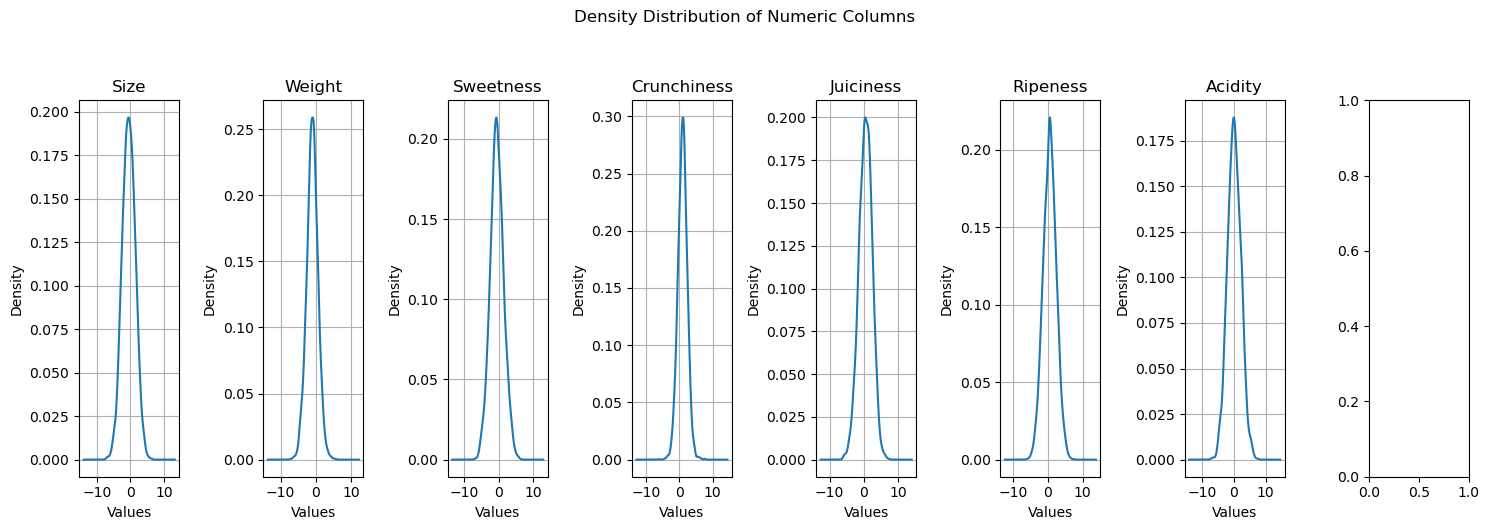

In [31]:
fig1, axes = plt.subplots(nrows=1, ncols=len(df_apple.columns), figsize=(15, 5))
fig1.suptitle('Density Distribution of Numeric Columns', y=1.05)

for i, column in enumerate(df_apple.drop('Quality', axis=1).columns):
    df_apple.drop('Quality', axis=1)[column].plot(kind='kde', ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

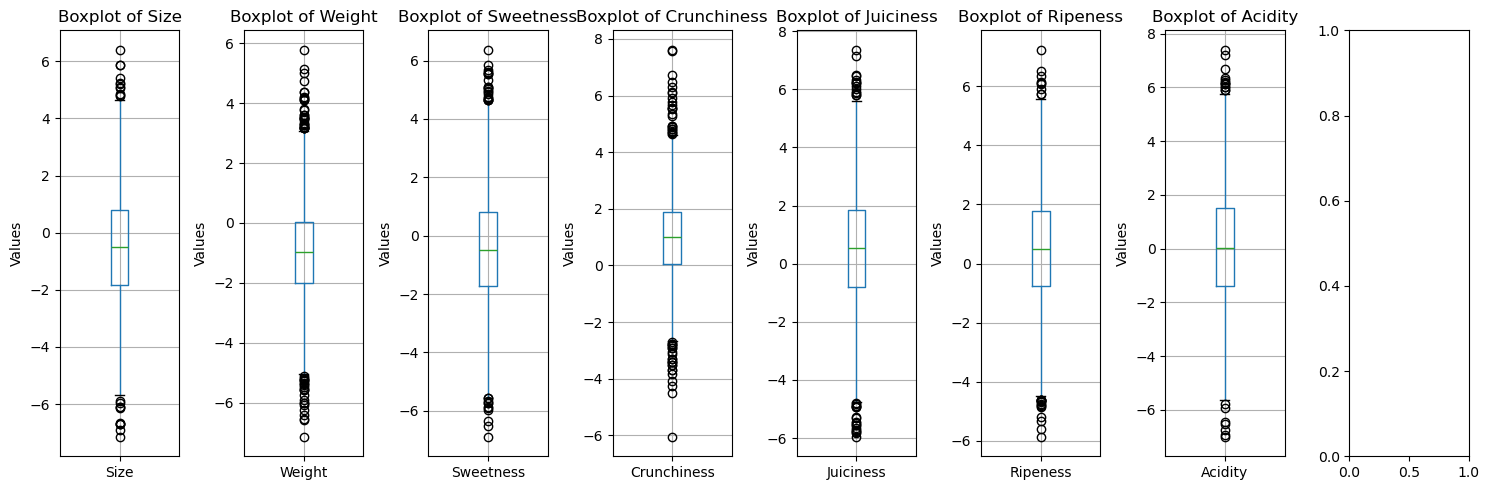

In [34]:
# Plot boxplots for each predictor
fig2, axes = plt.subplots(nrows=1, ncols=len(df_apple.columns), figsize=(15, 5))

for i, column in enumerate(df_apple.drop('Quality', axis=1).columns):
    df_apple.boxplot(column=column, ax=axes[i])
    axes[i].set_title('Boxplot of ' + column)
    axes[i].set_ylabel('Values')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

### Checking for Multicollinearity

In [11]:
X = add_constant(df_apple.drop('Quality', axis=1)) #remove target variable

# Create a DataFrame that will hold the feature names and their VIFs
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

       Feature       VIF
0        const  2.498135
1         Size  1.413203
2       Weight  1.347796
3    Sweetness  1.476987
4  Crunchiness  1.218052
5    Juiciness  1.219475
6     Ripeness  1.477834
7      Acidity  1.172115


# Loading Dataset 2 - Global Sales Records
Link: https://excelbianalytics.com/wp/downloads-18-sample-csv-files-data-sets-for-testing-sales/

In [42]:
df100k = pd.read_csv("data2/100000 Sales Records.csv").drop('Order ID', axis=1)
df100k.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,10/8/2014,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2/22/2015,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37


### Checking for missing values and column datatypes

In [43]:
#Get Column info
df100k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          100000 non-null  object 
 1   Country         100000 non-null  object 
 2   Item Type       100000 non-null  object 
 3   Sales Channel   100000 non-null  object 
 4   Order Priority  100000 non-null  object 
 5   Order Date      100000 non-null  object 
 6   Ship Date       100000 non-null  object 
 7   Units Sold      100000 non-null  int64  
 8   Unit Price      100000 non-null  float64
 9   Unit Cost       100000 non-null  float64
 10  Total Revenue   100000 non-null  float64
 11  Total Cost      100000 non-null  float64
 12  Total Profit    100000 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 9.9+ MB


### Checking For Class Imbalance

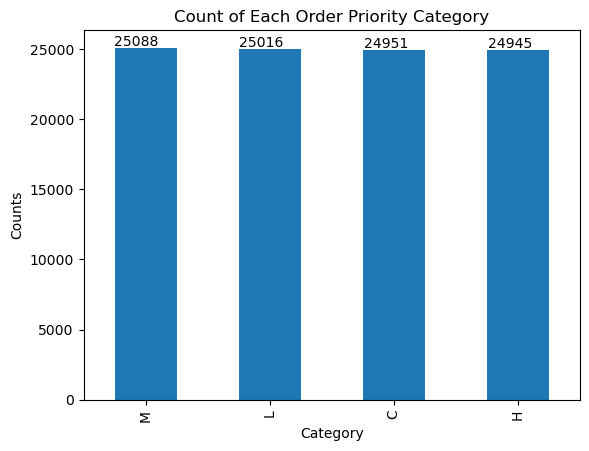

In [52]:
# Counting the occurrences of each category
category_counts = df100k['Order Priority'].value_counts()

# Plotting
ax = category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.title('Count of Each Order Priority Category')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

### Checking distribution of all Predictor Variables

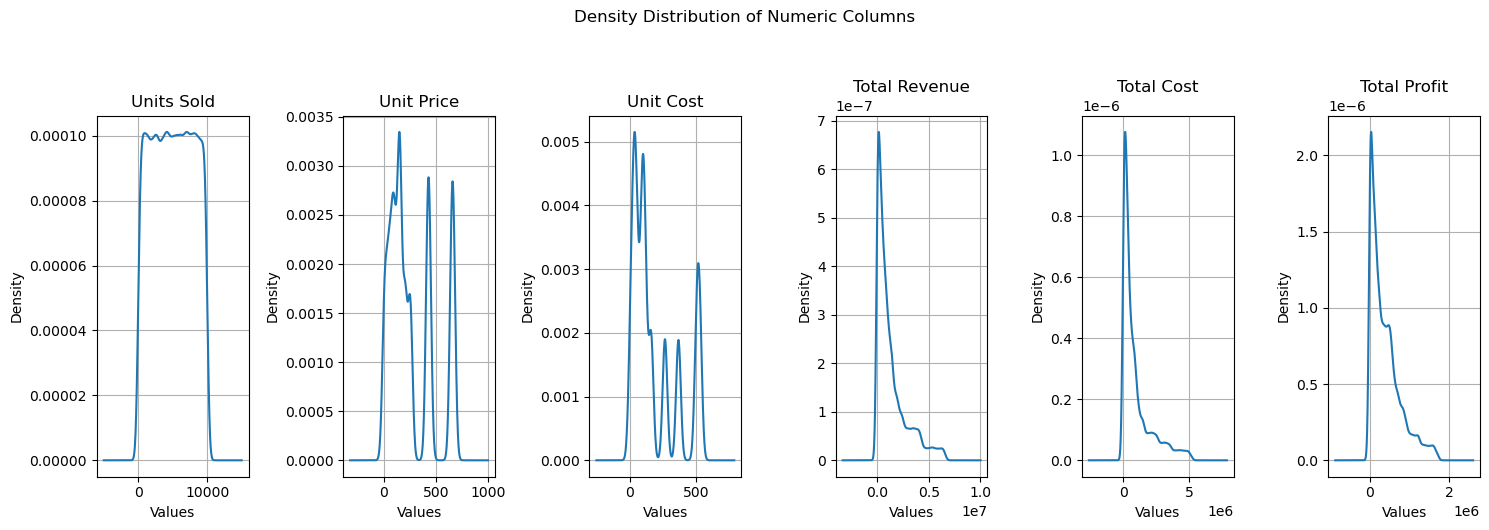

In [44]:
mask = df100k.dtypes.apply(lambda x: np.issubdtype(x, np.number))
numeric_df_using_mask = df100k.loc[:, mask]

fig3, axes = plt.subplots(nrows=1, ncols=len(numeric_df_using_mask.columns), figsize=(15, 5))
fig3.suptitle('Density Distribution of Numeric Columns', y=1.05)

for i, column in enumerate(numeric_df_using_mask.columns):
    df100k[column].plot(kind='kde', ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

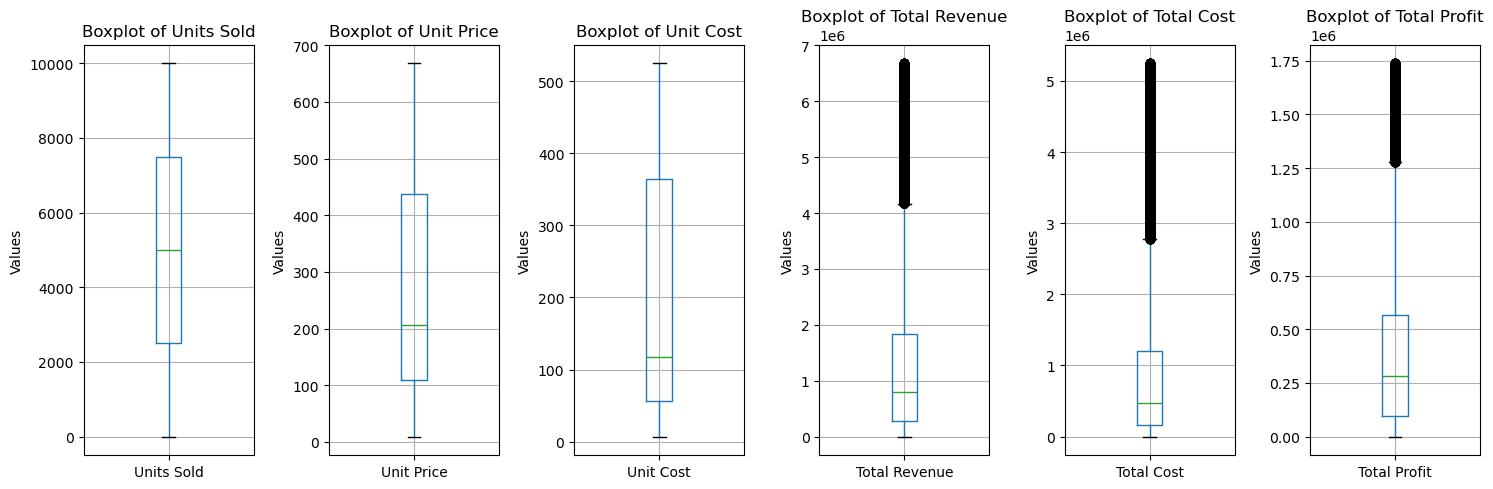

In [46]:
# Plot boxplots for each predictor
fig4, axes = plt.subplots(nrows=1, ncols=len(numeric_df_using_mask.columns), figsize=(15, 5))

for i, column in enumerate(numeric_df_using_mask.columns):
    numeric_df_using_mask.boxplot(column=column, ax=axes[i])
    axes[i].set_title('Boxplot of ' + column)
    axes[i].set_ylabel('Values')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

### Checking for Multicollinearity

In [49]:
X = add_constant(numeric_df_using_mask) #constant ensures that the regression model has an intercept

# Create a DataFrame that will hold the feature names and their VIFs
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

         Feature         VIF
0          const   12.971319
1     Units Sold    3.255320
2     Unit Price  144.726533
3      Unit Cost  144.858623
4  Total Revenue         inf
5     Total Cost         inf
6   Total Profit         inf


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
